### DataPreprocessig

In [4]:
import pandas as pd
'''training data'''
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt", sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
traindt = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

'''testing data'''
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
testdt = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

'''shuffle dataset'''
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

'''unigrams'''
import nltk
import helpers.data_mining_helpers as dmh
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))

'''CountVectorizer'''
from sklearn.feature_extraction.text import CountVectorizer
cvt = CountVectorizer()
train_counts = cvt.fit_transform(train_df.text)

'''term_frequencies'''
term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


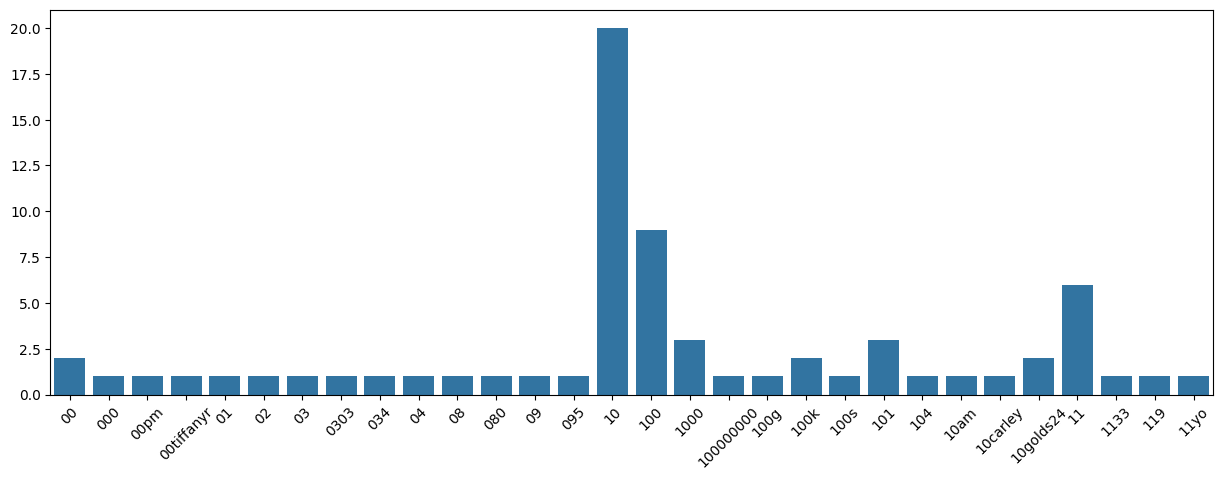

In [15]:
# Ans
import numpy as np
term_frequencies = np.asarray(train_counts.sum(axis=0))[0]
term_frequencies[0:10]
first_word_frequency = term_frequencies[0]
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15, 5))
g = sns.barplot(x=cvt.get_feature_names_out()[:30], 
            y=term_frequencies[:30])
g.set_xticks(range(30))
g.set_xticklabels(cvt.get_feature_names_out()[:30], rotation = 45);

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [19]:
# Ans
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                   tokenizer=nltk.word_tokenize
                                  )
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Features from index 100 to 110:")
print(feature_names[100:111])

Features from index 100 to 110:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday' 'be']


In [20]:
"😂" in feature_names

True

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Ans
'''I realize the matrix and the classification report, but I'm not good at English, so I used Chat-GPT to interpret them for my homework. However, 
I can express myself very well in Chinese, because my research include these.'''

# Classification Report:

# anger:
# Precision: 0.66 (66% of the predictions for "anger" are correct)
# Recall: 0.68 (68% of the actual "anger" samples are correctly identified)
# F1-Score: 0.67 (harmonic mean of precision and recall)

# Classification Report:

# [57, 18, 6, 3]:
# 57: Actual "anger" correctly predicted as "anger"
# 18: Actual "anger" predicted as "fear"
# 6: Actual "anger" predicted as "joy"
# 3: Actual "anger" predicted as "sadness"

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [29]:
from sklearn.naive_bayes import MultinomialNB

X_train = tfidf_vectorizer.transform(train_df['text'])
y_train = train_df['emotion']
X_test = tfidf_vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

# print('X_train.shape: ', X_train.shape)
# print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape)
# print('y_test.shape: ', y_test.shape)

clf = MultinomialNB()
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_test_pred[:10]

array(['fear', 'fear', 'joy', 'sadness', 'fear', 'fear', 'anger', 'anger',
       'joy', 'joy'], dtype='<U7')

In [39]:
## accuracy
from sklearn.metrics import accuracy_score

accTrain = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accTest = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('-----ACCURACY:')
print('training accuracy: {}'.format(round(accTrain, 2)))
print('testing accuracy: {}\n'.format(round(accTest, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report
print('-----EVALUATION')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('-----CONFUSION MATRIX')
print(cm)

-----ACCURACY:
training accuracy: 0.86
testing accuracy: 0.76

-----EVALUATION
              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347

-----CONFUSION MATRIX
[[ 60  18   3   3]
 [  5 101   2   2]
 [  3  14  59   3]
 [  3  21   5  45]]


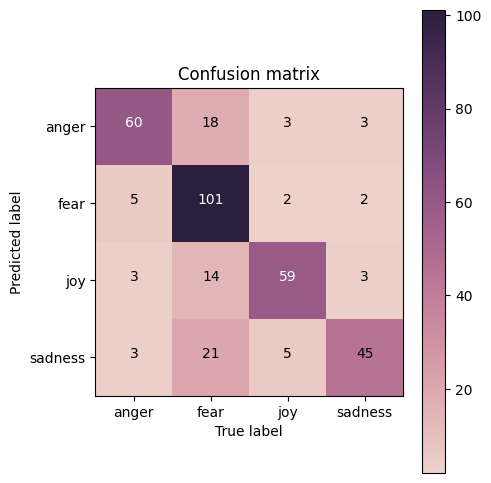

In [40]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')